In [1]:
import yt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
import numpy as np
import os
import functions

In [ ]:
plt.figure(figsize=(8,8), dpi=300)

sims_to_look_at = ["nongforce_1e6", "force_1e6"]
#sims_to_look_at = ['0.2_1e5']
snapshot = 'plt20480'

for i in sims_to_look_at: 
    path = i + '/' + snapshot
    ds, cube = functions.load_snapshot(path, ["RHOB", "WVX", "WVY", "WVZ"])
    k, e = functions.make_ke_ps(ds, cube)
    plt.loglog(k, e, label=i)
    
plt.legend()
plt.grid()
plt.savefig('figures/ps_diff_ic.png')



In [2]:
data_dir = r'cooling_1_1e7'
data, snaps = functions.ke_ps_for_each_snapshot(data_dir)
n_snaps = len(snaps)

index = np.argmax(data[1, :, -1])
kmax = data[0,:, -1][index]
Emax = data[1, :, -1][index]

yt : [INFO     ] 2024-07-09 10:47:18,447 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-07-09 10:47:18,449 Parameters: domain_dimensions         = [512 512   1]
yt : [INFO     ] 2024-07-09 10:47:18,449 Parameters: domain_left_edge          = [-1. -1.  0.]
yt : [INFO     ] 2024-07-09 10:47:18,450 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-07-09 10:47:19,200 Parameters: current_time              = 1.0
yt : [INFO     ] 2024-07-09 10:47:19,200 Parameters: domain_dimensions         = [512 512   1]
yt : [INFO     ] 2024-07-09 10:47:19,201 Parameters: domain_left_edge          = [-1. -1.  0.]
yt : [INFO     ] 2024-07-09 10:47:19,201 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-07-09 10:47:19,833 Parameters: current_time              = 2.0
yt : [INFO     ] 2024-07-09 10:47:19,834 Parameters: domain_dimensions         = [512 512   1]
yt : [INFO     ] 2024-07-09 10:47:19,834 Parameters: domain_left_edge          = [-1. 

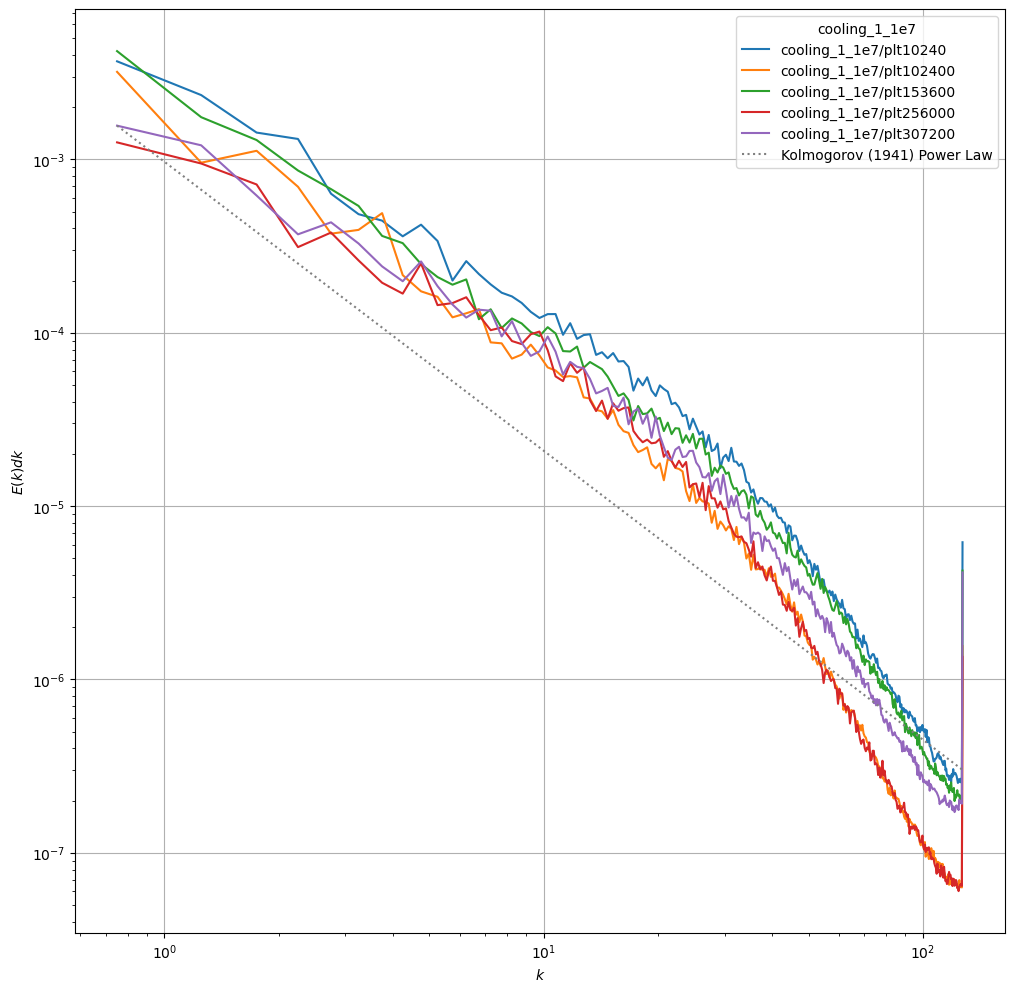

In [3]:
plt.figure(figsize=(12,12))

snaps_to_look_at = [10, 100, 150, 250, 300]

for i in snaps_to_look_at:
    plt.loglog(data[0, :, i], data[1, :, i], label=snaps[i])

plt.loglog(data[0,:, -1], Emax*(data[0,:, -1]/kmax)**(-5/3), ls=':', color="0.5", label='Kolmogorov (1941) Power Law')

plt.xlabel(r"$k$")
plt.ylabel(r"$E(k)dk$")

plt.grid()
plt.legend(title=data_dir)
os.makedirs(f'figures/{data_dir}', exist_ok=True)
plt.savefig(fname= f'figures/{data_dir}/'+r'ps_overtime.png', dpi=300)


In [ ]:
fig, ax = plt.subplots(figsize=(12,12), dpi=300)

line = ax.loglog(data[0, :, 1], data[1, :, 1])

def update(frame): 
    ax.cla()
    ax.grid()
    ax.plot(data[0, :, frame+start_at], data[1,:, frame+start_at], label=f't={frame+start_at}')
    ax.plot(data[0,:, -1], Emax*(data[0,:, -1]/kmax)**(-5/3), ls=':', color="0.5", label='Kolmogorov (1941) Power Law')
    ax.set_xlim(0.5, 254)
    ax.set_ylim(1e-10, 1e-2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(title=data_dir, fontsize=15)

#plt.show()

start_at = 0
anim = animation.FuncAnimation(fig=fig, func=update, frames=n_snaps-start_at, interval=200)
os.makedirs(f'figures/{data_dir}', exist_ok=True)  
anim.save(filename=f'figures/{data_dir}/t={start_at}..{n_snaps}.gif', writer='pillow')
#anim.show()
#plt.show()
